### MODULES
All the modules, constant, imports and libraries used

In [ ]:
import pandas as pd

FILE_INPUT_TSV = 'pois_all_info'
INPUT_IDS = 'ny_municipality_pois_id.csv'
PERCENTAGE_TO_PRINT_DATA = 0.05
CATEGORIES = {"amenity", 'public_transport', 'shop', 'highway'}

### READS THE MUNICIPALITY FILE
Reads the file containing the id of all the elements inside the municipality of New York. <br>
The file is organized as it follows: 
<ul>
<li>one id per row, where each id is a POI in New York municipality</li>
</ul>
Returns:
<ul>
<li>The list of IDs</li>
</ul>

In [123]:
def readIds(file:str)->list[str]:
    """reads the id of the municipality of New York

    Args:
        file (str): the path of the file containing the IDs

    Returns:
        list[str]: the list of ids
    """
    with open(file, "r", encoding='UTF-8') as fp:
        return [int(row.strip()) for row in fp]

### READ TSV FILE
Reads the tsv file containing all the filtered data, the file is organized as it follows:
<ul>
<li>@id: a unique id for each point of interest.</li>
<li>@lat: latitude coordinate of the POI in decimal degrees.</li>
<li>@lon: longitude coordinate of the POI in decimal degrees.</li>
<li>amenity name: if the POI category is amenity its type is reported in this field.</li>
<li>shop: if the POI category is shop its type is reported in this field.
<li>public_transport: if the POI category is public transport its type is reported in this field.</li>
<li>highway: if the POI category is highway its type is reported in this field.</li>
</ul>

The function requires as inputs:
<ol>
<li>The path to the file containing all the data of POI</li>
<li>The path to the file containing all the ids of the POI in NY municipality</li>
</ol>

Returns:
<ol>
<li>A dataFrame containing the mentioned columns and that uses @id as index</li>
</ol>

In [124]:
def readPOIs(dataFile:str, POIsUnique:str)->pd.DataFrame:
       """
       Reads the data and saves them into a pandas dataFrame

       Args:
           dataFile (str): the file of the path containing the TSV
           POIsUnique (str): the file containing the IDs of New York

       Returns:
           DataFrame (pd.DataFrame): The data frame containing all the given data of the municipality of New York
       """
       return (pd.read_csv(dataFile, sep='\t', header=0, encoding='UTF-8', 
                       dtype={'@id':int, 'name':str, 'amenity':str,'shop':str, 
                              'public_transport':str,'highway':str}, 
                       index_col='@id')
            ).loc[readIds(POIsUnique)]

### PLOTS THE HISTOGRAM OF ALL POIs

This function plots the histogram of all the columns here


In [127]:
def plotPOIHistogram(df:pd.DataFrame, percentage:float, columns:set[str]) -> None:
    for item in list(columns):
        pd.DataFrame(df.loc[:, item].value_counts(normalize=True)[df.loc[:, item].value_counts(normalize=True)>percentage]).plot.bar()

## MAIN FUNCTION
This is the main function of the file that will control the flow of the program, it executes what follows:
<ol>
<li>Reads the file containing all POIs (already filtered)</li>
<li>Plots the histogram of the distribution types only for data above a certain threshold</li>
<li></li>
<li></li>
<li></li>
<li></li>
</ol>


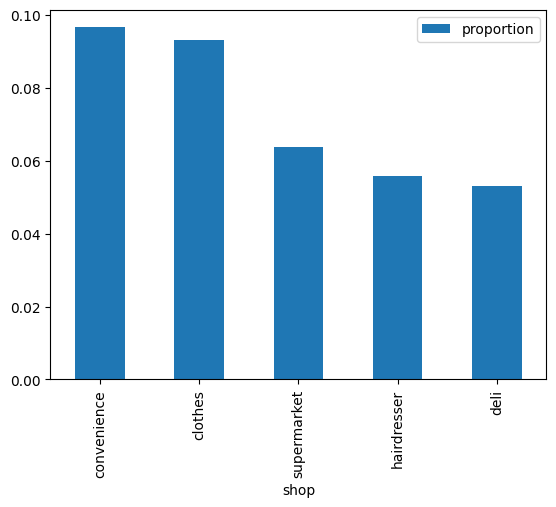

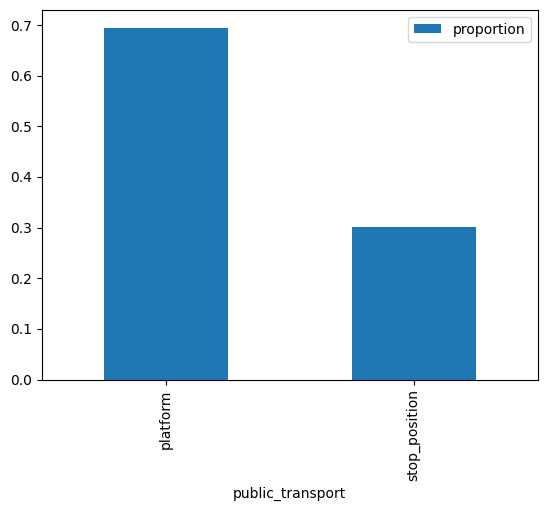

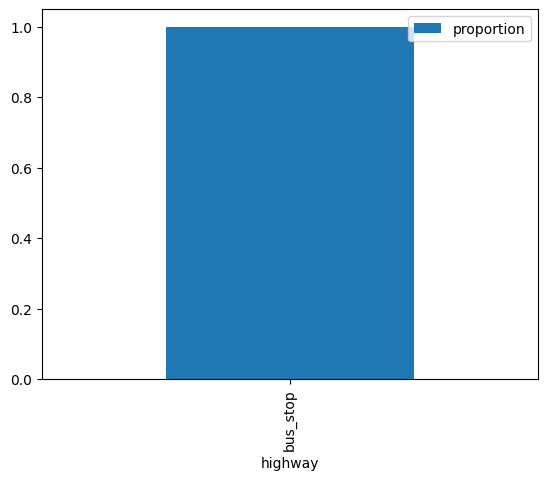

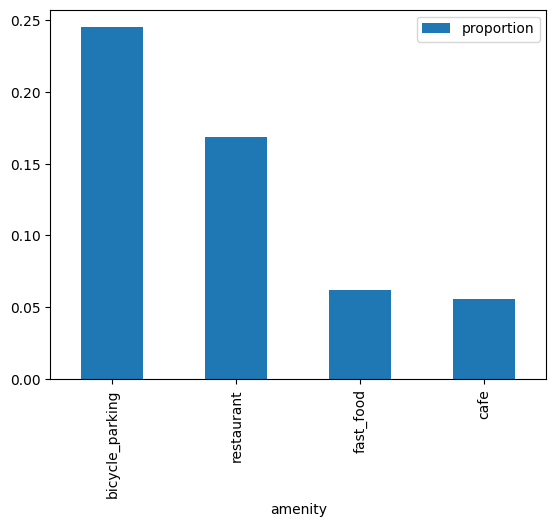

In [128]:
def main()->None:
    pois = readPOIs(FILE_INPUT_TSV, INPUT_IDS)
    plotPOIHistogram(pois, PERCENTAGE_TO_PRINT_DATA, CATEGORIES)
    
    
main()